## Calculating Efficiency Metrics

In [2]:
# Importing the necessary packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig

In [3]:
# Loading in the data set
df =pd.read_csv('csv_files/FinishedDataset_Classification.csv', header=0)

In [4]:
# Looking at the column names
df.columns

Index(['Unnamed: 0', 'DATE', 'MATCHUP', 'MIN', 'H_TEAM', 'A_TEAM', 'H_FGM',
       'H_FGA', 'H_FGPerc', 'H_3PM', 'H_3PA', 'H_ThreePPerc', 'H_FTM', 'H_FTA',
       'H_FTPerc', 'H_OREB', 'H_DREB', 'H_REB', 'H_AST', 'H_STL', 'H_BLK',
       'H_TOV', 'H_PF', 'H_EFGPerc', 'H_FTR', 'H_TOVPerc', 'A_FGM', 'A_FGA',
       'A_FGPerc', 'A_3PM', 'A_3PA', 'A_ThreePPerc', 'A_FTM', 'A_FTA',
       'A_FTPerc', 'A_OREB', 'A_DREB', 'A_REB', 'A_AST', 'A_STL', 'A_BLK',
       'A_TOV', 'A_PF', 'A_EFGPerc', 'A_FTR', 'A_TOVPerc', 'Target'],
      dtype='object')

In [5]:
# Calculating the efficiency metrics

#Calculating both home and away defensive rebounding percentage
df['H_DREBPct'] = df['H_DREB'] / (df['H_DREB'] + df['A_OREB'])
df['A_DREBPct'] = df['A_DREB'] / (df['A_DREB'] + df['H_OREB'])

# Calculating both home and away offensive rebounding percentage
df['H_OREBPct'] = df['H_OREB'] / (df['H_OREB'] + df['A_DREB'])
df['A_OREBPct'] = df['A_OREB'] / (df['A_OREB'] + df['H_DREB'])

# Calculating both home and away total rebound percentage
df['H_REBPct'] = df['H_REB'] / (df['H_REB'] + df['A_REB'])
df['A_REBPct'] = df['A_REB'] / (df['A_REB'] + df['H_REB'])

# Calculating both home and away block percentage
df['H_BLKPct'] = df['H_BLK'] / df['A_FGA']
df['A_BLKPct'] = df['A_BLK'] / df['H_FGA']

# Calculating both home and away assist ratio 
df['H_ASTRatio'] = df['H_AST'] / (df['H_FGA'] + (df['H_FTA'] * 0.44) + df['H_AST'] + df['H_TOV'])
df['A_ASTRatio'] = df['A_AST'] / (df['A_FGA'] + (df['A_FTA'] * 0.44) + df['A_AST'] + df['A_TOV'])

# Calculating both home and away assit to turnover ratio
df['H_AST_TOV_Ratio'] = df['H_AST'] / df['H_TOV']
df['A_AST_TOV_Ratio'] = df['A_AST'] / df['A_TOV']

# Calculating both home and away 3 Point Attempt Rate
df['H_ThreePARt'] = df['H_3PA'] / df['H_FGA']
df['A_ThreePARt'] = df['A_3PA'] / df['A_FGA']

In [6]:
df.columns

Index(['Unnamed: 0', 'DATE', 'MATCHUP', 'MIN', 'H_TEAM', 'A_TEAM', 'H_FGM',
       'H_FGA', 'H_FGPerc', 'H_3PM', 'H_3PA', 'H_ThreePPerc', 'H_FTM', 'H_FTA',
       'H_FTPerc', 'H_OREB', 'H_DREB', 'H_REB', 'H_AST', 'H_STL', 'H_BLK',
       'H_TOV', 'H_PF', 'H_EFGPerc', 'H_FTR', 'H_TOVPerc', 'A_FGM', 'A_FGA',
       'A_FGPerc', 'A_3PM', 'A_3PA', 'A_ThreePPerc', 'A_FTM', 'A_FTA',
       'A_FTPerc', 'A_OREB', 'A_DREB', 'A_REB', 'A_AST', 'A_STL', 'A_BLK',
       'A_TOV', 'A_PF', 'A_EFGPerc', 'A_FTR', 'A_TOVPerc', 'Target',
       'H_DREBPct', 'A_DREBPct', 'H_OREBPct', 'A_OREBPct', 'H_REBPct',
       'A_REBPct', 'H_BLKPct', 'A_BLKPct', 'H_ASTRatio', 'A_ASTRatio',
       'H_AST_TOV_Ratio', 'A_AST_TOV_Ratio', 'H_ThreePARt', 'A_ThreePARt'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,DATE,MATCHUP,MIN,H_TEAM,A_TEAM,H_FGM,H_FGA,H_FGPerc,H_3PM,...,H_REBPct,A_REBPct,H_BLKPct,A_BLKPct,H_ASTRatio,A_ASTRatio,H_AST_TOV_Ratio,A_AST_TOV_Ratio,H_ThreePARt,A_ThreePARt
0,0,6/5/19,GSW vs. TOR,241,GSW,TOR,36,91,39.6,12,...,0.506173,0.493827,0.036585,0.109890,0.174581,0.221828,1.785714,2.142857,0.395604,0.463415
1,1,6/2/19,TOR vs. GSW,240,TOR,GSW,35,94,37.2,11,...,0.538462,0.461538,0.024390,0.053191,0.123690,0.240930,1.133333,2.266667,0.404255,0.414634
2,2,5/30/19,TOR vs. GSW,241,TOR,GSW,39,77,50.6,13,...,0.486486,0.513514,0.076923,0.025974,0.198287,0.212237,2.500000,1.812500,0.428571,0.397436
3,3,5/25/19,TOR vs. MIL,239,TOR,MIL,36,74,48.6,12,...,0.475000,0.525000,0.053333,0.094595,0.175932,0.160148,2.000000,1.727273,0.364865,0.453333
4,4,5/23/19,MIL vs. TOR,240,MIL,TOR,38,84,45.2,10,...,0.540816,0.459184,0.023810,0.047619,0.201675,0.154925,2.363636,3.166667,0.369048,0.511905


In [8]:
df.columns

Index(['Unnamed: 0', 'DATE', 'MATCHUP', 'MIN', 'H_TEAM', 'A_TEAM', 'H_FGM',
       'H_FGA', 'H_FGPerc', 'H_3PM', 'H_3PA', 'H_ThreePPerc', 'H_FTM', 'H_FTA',
       'H_FTPerc', 'H_OREB', 'H_DREB', 'H_REB', 'H_AST', 'H_STL', 'H_BLK',
       'H_TOV', 'H_PF', 'H_EFGPerc', 'H_FTR', 'H_TOVPerc', 'A_FGM', 'A_FGA',
       'A_FGPerc', 'A_3PM', 'A_3PA', 'A_ThreePPerc', 'A_FTM', 'A_FTA',
       'A_FTPerc', 'A_OREB', 'A_DREB', 'A_REB', 'A_AST', 'A_STL', 'A_BLK',
       'A_TOV', 'A_PF', 'A_EFGPerc', 'A_FTR', 'A_TOVPerc', 'Target',
       'H_DREBPct', 'A_DREBPct', 'H_OREBPct', 'A_OREBPct', 'H_REBPct',
       'A_REBPct', 'H_BLKPct', 'A_BLKPct', 'H_ASTRatio', 'A_ASTRatio',
       'H_AST_TOV_Ratio', 'A_AST_TOV_Ratio', 'H_ThreePARt', 'A_ThreePARt'],
      dtype='object')

In [9]:
# Dropping columns that are not necessary 
df = df.drop(['Unnamed: 0', 'H_FGM', 'H_FGA', 'H_3PM', 'H_3PA', 'H_FTM', 'H_FTA', 'H_OREB',
             'H_DREB', 'H_REB', 'H_AST', 'H_STL', 'H_BLK', 'H_TOV', 'H_PF', 'A_FGM', 'A_FGA', 
              'A_3PM', 'A_3PA', 'A_FTM', 'A_FTA', 'A_OREB', 
              'A_DREB', 'A_REB', 'A_AST', 'A_STL', 'A_BLK', 'A_TOV', 'A_PF' ], axis=1)

In [10]:
# Renaming the columns to make all the same 
df.rename(columns={'H_FGPerc':'H_FGPct','H_ThreePPerc':'H_ThreePPct', 'H_EFGPerc':'H_EFGPct','H_FTPerc':'H_FTPct','H_TOVPerc':'H_TOVPct',
                  'A_FGPerc':'A_FGPct','A_ThreePPerc':'A_ThreePPct', 'A_EFGPerc':'A_EFGPct','A_FTPerc':'A_FTPct','A_TOVPerc':'A_TOVPct'}, inplace=True)

In [11]:
df.columns

Index(['DATE', 'MATCHUP', 'MIN', 'H_TEAM', 'A_TEAM', 'H_FGPct', 'H_ThreePPct',
       'H_FTPct', 'H_EFGPct', 'H_FTR', 'H_TOVPct', 'A_FGPct', 'A_ThreePPct',
       'A_FTPct', 'A_EFGPct', 'A_FTR', 'A_TOVPct', 'Target', 'H_DREBPct',
       'A_DREBPct', 'H_OREBPct', 'A_OREBPct', 'H_REBPct', 'A_REBPct',
       'H_BLKPct', 'A_BLKPct', 'H_ASTRatio', 'A_ASTRatio', 'H_AST_TOV_Ratio',
       'A_AST_TOV_Ratio', 'H_ThreePARt', 'A_ThreePARt'],
      dtype='object')

In [12]:
# Making the columns into a list in order to rearrange them
columns = ['DATE', 'MATCHUP', 'MIN', 'H_TEAM', 'A_TEAM', 'H_FGPct', 'H_ThreePPct', 'H_FTPct', 'H_EFGPct', 'H_ThreePARt', 'H_FTR', 'H_TOVPct', 'H_DREBPct',
          'H_OREBPct', 'H_REBPct', 'H_BLKPct', 'H_ASTRatio', 'H_AST_TOV_Ratio', 'A_FGPct', 'A_ThreePPct', 'A_FTPct', 'A_EFGPct', 'A_ThreePARt', 'A_FTR', 
           'A_TOVPct', 'A_DREBPct','A_OREBPct', 'A_REBPct', 'A_BLKPct', 'A_ASTRatio', 'A_AST_TOV_Ratio', 'Target']

In [13]:
# Changing the order of the colums
df = pd.DataFrame(df, columns = ['DATE', 'MATCHUP', 'MIN', 'H_TEAM', 'A_TEAM', 'H_FGPct', 'H_ThreePPct', 'H_FTPct', 'H_EFGPct', 'H_ThreePARt', 'H_FTR', 'H_TOVPct', 'H_DREBPct',
          'H_OREBPct', 'H_REBPct', 'H_BLKPct', 'H_ASTRatio', 'H_AST_TOV_Ratio', 'A_FGPct', 'A_ThreePPct', 'A_FTPct', 'A_EFGPct', 'A_ThreePARt', 'A_FTR', 
           'A_TOVPct', 'A_DREBPct','A_OREBPct', 'A_REBPct', 'A_BLKPct', 'A_ASTRatio', 'A_AST_TOV_Ratio', 'Target'])

In [14]:
df.columns

Index(['DATE', 'MATCHUP', 'MIN', 'H_TEAM', 'A_TEAM', 'H_FGPct', 'H_ThreePPct',
       'H_FTPct', 'H_EFGPct', 'H_ThreePARt', 'H_FTR', 'H_TOVPct', 'H_DREBPct',
       'H_OREBPct', 'H_REBPct', 'H_BLKPct', 'H_ASTRatio', 'H_AST_TOV_Ratio',
       'A_FGPct', 'A_ThreePPct', 'A_FTPct', 'A_EFGPct', 'A_ThreePARt', 'A_FTR',
       'A_TOVPct', 'A_DREBPct', 'A_OREBPct', 'A_REBPct', 'A_BLKPct',
       'A_ASTRatio', 'A_AST_TOV_Ratio', 'Target'],
      dtype='object')

In [15]:
df.head(5)

,DATE,MATCHUP,MIN,H_TEAM,A_TEAM,H_FGPct,H_ThreePPct,H_FTPct,H_EFGPct,H_ThreePARt,...,A_ThreePARt,A_FTR,A_TOVPct,A_DREBPct,A_OREBPct,A_REBPct,A_BLKPct,A_ASTRatio,A_AST_TOV_Ratio,Target
0,6/5/19,GSW vs. TOR,241,GSW,TOR,39.6,33.3,0.833,0.461538,0.395604,...,0.463415,0.256098,13.302927,0.729167,0.151515,0.493827,0.109890,0.221828,2.142857,0
1,6/2/19,TOR vs. GSW,240,TOR,GSW,37.2,28.9,0.885,0.430851,0.404255,...,0.414634,0.280488,14.002987,0.705882,0.150000,0.461538,0.053191,0.240930,2.266667,0
2,5/30/19,TOR vs. GSW,241,TOR,GSW,50.6,39.4,0.844,0.590909,0.428571,...,0.397436,0.397436,14.864363,0.805556,0.236842,0.513514,0.025974,0.212237,1.812500,1
3,5/25/19,TOR vs. MIL,239,TOR,MIL,48.6,44.4,0.727,0.567568,0.364865,...,0.453333,0.413333,11.039743,0.833333,0.272727,0.525000,0.094595,0.160148,1.727273,1
4,5/23/19,MIL vs. TOR,240,MIL,TOR,45.2,32.3,0.722,0.511905,0.369048,...,0.511905,0.369048,5.789271,0.813953,0.181818,0.459184,0.047619,0.154925,3.166667,0


In [16]:
# export working dataframe to csv
df.to_csv('csv_files/Efficiency_Calculations.csv')

In [17]:
# Dropping columns that are not necessary for the modeling 
df = df.drop(['DATE', 'MATCHUP', 'MIN', 'H_TEAM', 'A_TEAM' ], axis=1)

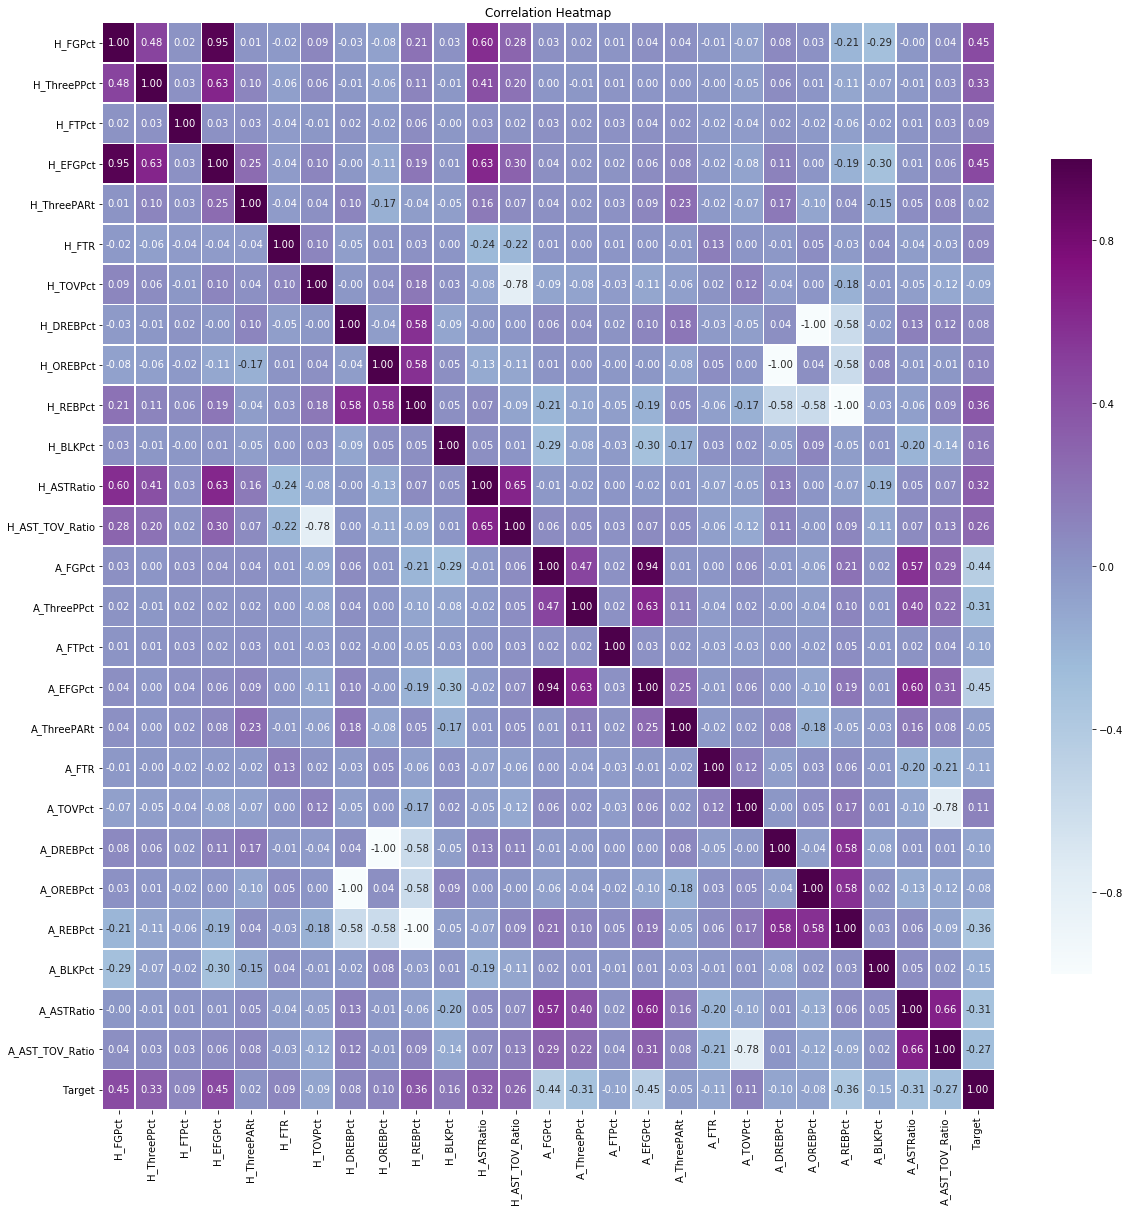

In [18]:
# Creating a correlation heatmap to see if any of the variables are very highly correlated

#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')
figure = display.get_figure()
figure.savefig('images/HEATMAP.PNG')

In [19]:
# Dropping the highly correlated variables 
df = df.drop(['H_FGPct', 'H_ThreePPct', 'A_FGPct', 'A_ThreePPct', 'H_DREBPct', 'H_OREBPct', 
              'A_DREBPct', 'A_OREBPct', 'H_TOVPct', 'A_TOVPct', 'H_ASTRatio', 'A_ASTRatio'], axis=1)

In [20]:
df.columns

Index(['H_FTPct', 'H_EFGPct', 'H_ThreePARt', 'H_FTR', 'H_REBPct', 'H_BLKPct',
       'H_AST_TOV_Ratio', 'A_FTPct', 'A_EFGPct', 'A_ThreePARt', 'A_FTR',
       'A_REBPct', 'A_BLKPct', 'A_AST_TOV_Ratio', 'Target'],
      dtype='object')

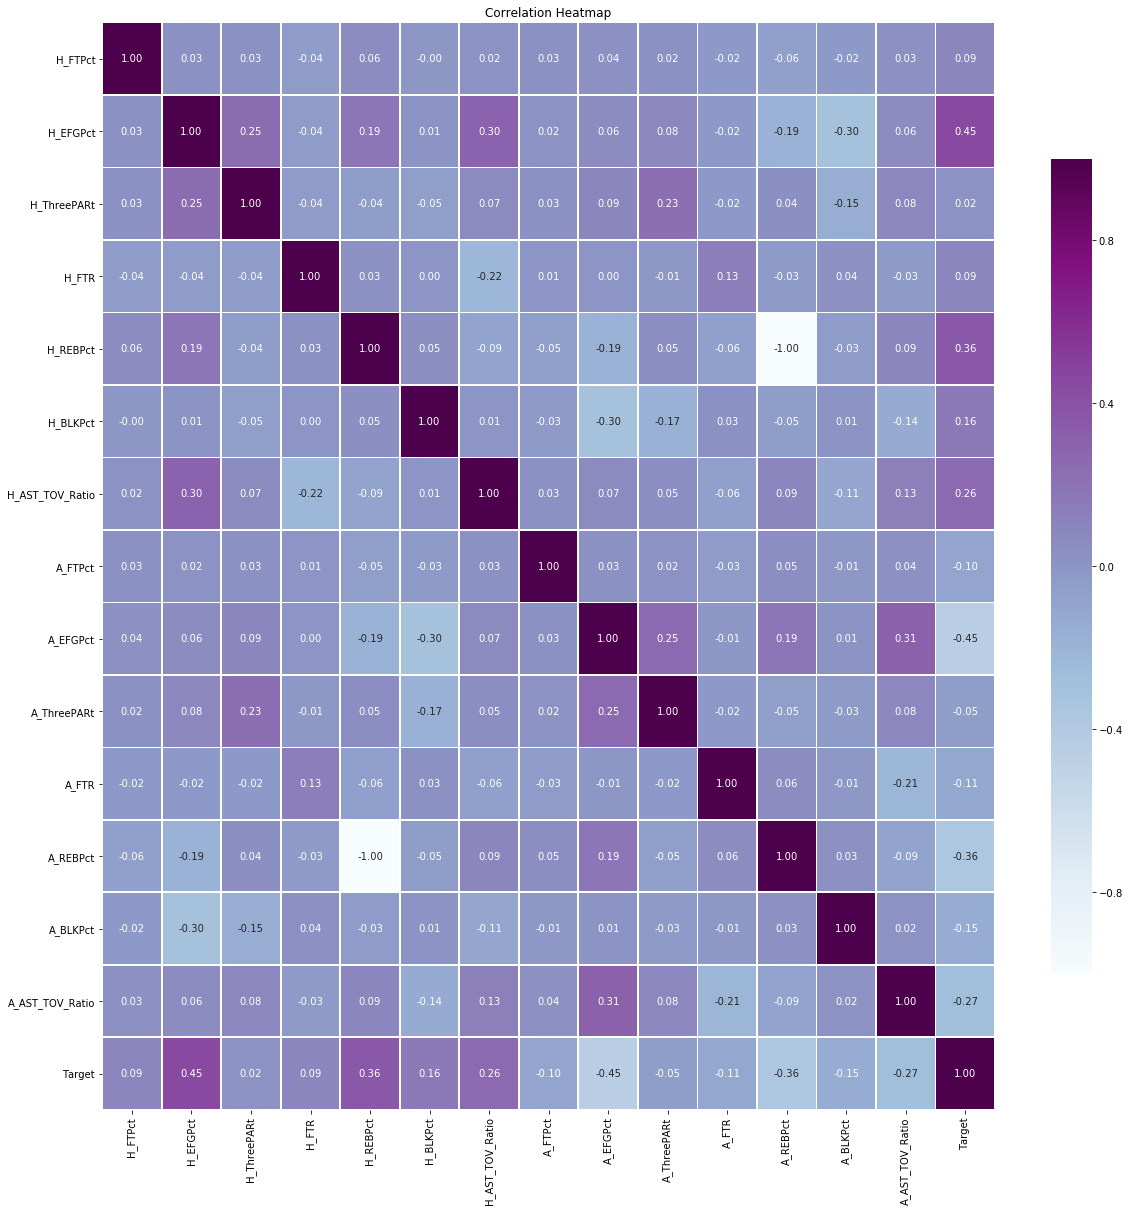

In [21]:
# Creating a correlation heatmap to see difference with highly correlated variables taken out 

#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')
figure = display.get_figure()
figure.savefig('images/UPDATED_HEATMAP.PNG')

In [22]:
df.to_csv('csv_files/Model_Ready_Classification.csv')

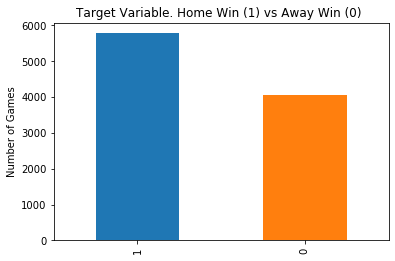

In [23]:
# Plotting the target variable
# Looking at the target variable
fig = plt.figure()
df['Target'].value_counts().plot(kind='bar', title="Target Variable. Home Win (1) vs Away Win (0) ")
plt.ylabel('Number of Games')
plt.show()
fig.savefig('images/Binary_TARGET.PNG')

In [24]:
df['Target'].value_counts()

1    5780
0    4064
Name: Target, dtype: int64

In [25]:
df.columns

Index(['H_FTPct', 'H_EFGPct', 'H_ThreePARt', 'H_FTR', 'H_REBPct', 'H_BLKPct',
       'H_AST_TOV_Ratio', 'A_FTPct', 'A_EFGPct', 'A_ThreePARt', 'A_FTR',
       'A_REBPct', 'A_BLKPct', 'A_AST_TOV_Ratio', 'Target'],
      dtype='object')

In [26]:
df.head()

,H_FTPct,H_EFGPct,H_ThreePARt,H_FTR,H_REBPct,H_BLKPct,H_AST_TOV_Ratio,A_FTPct,A_EFGPct,A_ThreePARt,A_FTR,A_REBPct,A_BLKPct,A_AST_TOV_Ratio,Target
0,0.833,0.461538,0.395604,0.329670,0.506173,0.036585,1.785714,0.952,0.628049,0.463415,0.256098,0.493827,0.109890,2.142857,0
1,0.885,0.430851,0.404255,0.276596,0.538462,0.024390,1.133333,0.870,0.542683,0.414634,0.280488,0.461538,0.053191,2.266667,0
2,0.844,0.590909,0.428571,0.415584,0.486486,0.076923,2.500000,0.935,0.512821,0.397436,0.397436,0.513514,0.025974,1.812500,1
3,0.727,0.567568,0.364865,0.297297,0.475000,0.053333,2.000000,0.710,0.480000,0.453333,0.413333,0.525000,0.094595,1.727273,1
4,0.722,0.511905,0.369048,0.214286,0.540816,0.023810,2.363636,0.806,0.476190,0.511905,0.369048,0.459184,0.047619,3.166667,0


In [ ]:
new_columns = ['H_FTPct', 'H_EFGPct', 'H_ThreePARt', 'H_FTR', 'H_REBPct', 'H_AST_TOV_Ratio', 
               'Target', 'A_FTPct', 'A_EFGPct', 'A_ThreePARt', 'A_FTR', 'A_REBPct', 'A_BLKPct', 'A_AST_TOV_Ratio']